# MSc in Artificial Intelligence - Natural Language Processing
## Toliopoulou Christianna (mtn2033)

In this exercise you are asked to classify tweets according to the sentiment they convey (i.e. positive,negative or neutral). For this purpose you are given a subset taken from the dataset available for SemEval-2017, Task 4, “Sentiment Analysis in Twitter” (http://alt.qcri.org/semeval2017/task4/index.php?id=results).

You can find the required test data in the following location:
https://drive.google.com/file/d/1TP55ZimN7g9ckW7pMFk0dKLCG7OPEFt9/view?usp=drivesdk

The data have already been cleaned and ready to use.

You are required to find the sentiment conveyed in the tweets found in the test datasets.

For this task you will need to use the TexBlob Python library.

The documentation for the library can be found here

# Project 3 Sentiment Analysis

# Import libraries

In [18]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]



from textblob import _text
from textblob import TextBlob
import pandas as pd
import numpy as np
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

# Read data

In this section we read the data and convert them into a dataframe suitable for analysis

In [19]:
mydata= pd.read_csv('twitter-2016test-A-clean.tsv', sep='\t')
df = pd.DataFrame(mydata)

# Sentiment polarity with Textblob library

In [20]:
polar_ar = []

for mes in df['text']:
       blob_sent = TextBlob(mes)
       pol_value = blob_sent.sentiment.polarity
       polar_ar.append(pol_value)

# Separate the three classes 

In [21]:

polarity = np.array(polar_ar)
df['values'] = polarity
print("Thresholds",pd.cut(polarity,3))
three_polars = pd.cut(polarity,3, labels=["negative", "neutral", "positive"])
print(three_polars)
df['pred_sent'] = three_polars
print(df)

Thresholds [(-0.333, 0.333], (-0.333, 0.333], (-0.333, 0.333], (0.333, 1.0], (-0.333, 0.333], ..., (-0.333, 0.333], (-0.333, 0.333], (-1.002, -0.333], (-0.333, 0.333], (-0.333, 0.333]]
Length: 15651
Categories (3, interval[float64]): [(-1.002, -0.333] < (-0.333, 0.333] < (0.333, 1.0]]
['neutral', 'neutral', 'neutral', 'positive', 'neutral', ..., 'neutral', 'neutral', 'negative', 'neutral', 'neutral']
Length: 15651
Categories (3, object): ['negative' < 'neutral' < 'positive']
                 tweet_id sentiment  \
0      619950566786113536   neutral   
1      619969366986235905   neutral   
2      619974445185302528   neutral   
3      619987808317407232  positive   
4      619994586182619136  positive   
...                   ...       ...   
15646  681877834982232064   neutral   
15647  681879579129200640  positive   
15648  681883903259357184   neutral   
15649  681904976860327936  negative   
15650  681910549211287552   neutral   

                                                   

#  Calculate the accuracy, precision, recall and f-score of the classification

In [22]:

print("Accuracy of the prediction",metrics.accuracy_score(df['sentiment'],df['pred_sent']))
print("Precision of the prediction",metrics.precision_score(df['sentiment'],df['pred_sent'],average=None))
print("Recall of the prediction",metrics.recall_score(df['sentiment'],df['pred_sent'],average=None))
print("F-Score of the prediction",metrics.f1_score(df['sentiment'],df['pred_sent'],average=None))

print(metrics.confusion_matrix(df['sentiment'],df['pred_sent']))

Accuracy of the prediction 0.5636061593508402
Precision of the prediction [0.43053817 0.5587957  0.61388286]
Recall of the prediction [0.14891775 0.82867713 0.36005089]
F-Score of the prediction [0.22129302 0.6674887  0.45388933]
[[ 344 1740  226]
 [ 323 6496 1020]
 [ 132 3389 1981]]


# Step to step search for seperation of classes in order to find best values

In [23]:
topneg = 0
toppos = 0
topacc = 0
new_polar = []
best_new = []


for max_neg in np.arange(-0.400,-0.300,0.005):

       for max_pos in np.arange(0.300, 0.400, 0.005):

              for value in df['values']:
                     if value > max_pos:
                            new_polar.append('positive')
                     elif value < max_neg:
                            new_polar.append('negative')
                     else:
                            new_polar.append('neutral')
              df['new_polar'] = np.array(new_polar)
            
              new_polar.clear()
              if (metrics.accuracy_score(df['sentiment'],df['new_polar'])) > topacc:
                     topneg = max_neg
                     toppos = max_pos
                     topacc = metrics.accuracy_score(df['sentiment'],df['new_polar'])
                     best_precision = metrics.precision_score(df['sentiment'], df['new_polar'], average=None)
                     best_recall = metrics.recall_score(df['sentiment'], df['new_polar'], average=None)
                     best_fscore = metrics.f1_score(df['sentiment'], df['new_polar'], average=None)
                     best_new = df['new_polar'].tolist()
              del df['new_polar']

# Results for the best negative and positive thresholds

In [24]:
df['new_polar'] = np.array(best_new)

print("The best accuracy after performing extensive search",topacc)
print("Best negative threshold",topneg)
print("Best positive threshold",toppos)
print("Best Precision of the prediction",metrics.precision_score(df['sentiment'],df['new_polar'],average=None))
print("Best Recall of the prediction",metrics.recall_score(df['sentiment'],df['new_polar'],average=None))
print("Best F-Score of the prediction",metrics.f1_score(df['sentiment'],df['new_polar'],average=None))


print(metrics.confusion_matrix(df['sentiment'],df['new_polar']))

The best accuracy after performing extensive search 0.5709539326560603
Best negative threshold -0.4
Best positive threshold 0.3
Best Precision of the prediction [0.46615087 0.56235516 0.61527419]
Best Recall of the prediction [0.104329   0.8358209  0.38949473]
Best F-Score of the prediction [0.17049876 0.67234479 0.47701725]
[[ 241 1827  242]
 [ 189 6552 1098]
 [  87 3272 2143]]


[[ 241 1827  242]
 [ 189 6552 1098]
 [  87 3272 2143]]


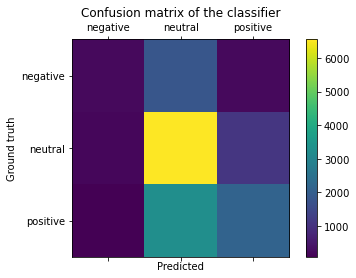

In [25]:
import  matplotlib.pyplot as plt
targ = ['negative', 'neutral','positive']
cm = metrics.confusion_matrix(df['sentiment'],df['new_polar'], targ)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + targ)
ax.set_yticklabels([''] + targ)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')
plt.show()